# DOCUMENTATION
- Does your data set contain missing values?
  -  No

- Number of Instances (records in your data set):
  - 13611

- Number of Attributes (fields within each record):
  -  17

Relevant Information:
Seven different types of dry beans were used in this research, taking into account the features such as form, shape, type, and structure by the market situation. A computer vision system was developed to distinguish seven different registered varieties of dry beans with similar features in order to obtain uniform seed classification. For the classification model, images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. Bean images obtained by computer vision system were subjected to segmentation and feature extraction stages, and a total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.

Attribute Information:
1.  Area (A): The area of a bean zone and the number of pixels within its boundaries.
2. Perimeter (P): Bean circumference is defined as the length of its border.
3. Major axis length (L): The distance between the ends of the longest line that can be drawn from a bean.
4. Minor axis length (l): The longest line that can be drawn from the bean while standing perpendicular to the main axis.
5. Aspect ratio (K): Defines the relationship between L and l.
6. Eccentricity (Ec): Eccentricity of the ellipse having the same moments as the region.
7. Convex area (C): Number of pixels in the smallest convex polygon that can contain the area of a bean seed.
8. Equivalent diameter (Ed): The diameter of a circle having the same area as a bean seed area.
9. Extent (Ex): The ratio of the pixels in the bounding box to the bean area.
10. Solidity (S): Also known as convexity. The ratio of the pixels in the convex shell to those found in beans.
11. Roundness (R): Calculated with the following formula: (4piA)/(P^2)
12. Compactness (CO): Measures the roundness of an object: Ed/L
13. ShapeFactor1 (SF1)
14. ShapeFactor2 (SF2)
15. ShapeFactor3 (SF3)
16. ShapeFactor4 (SF4)
17. Class (Seker, Barbunya, Bombay, Cali, Dermosan, Horoz and Sira)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,  classification_report

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
bean1= pd.read_excel("/content/drive/MyDrive/mydataset/Dry_Bean - CLAssification /Dry_Bean_Dataset.xlsx")
bean1

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


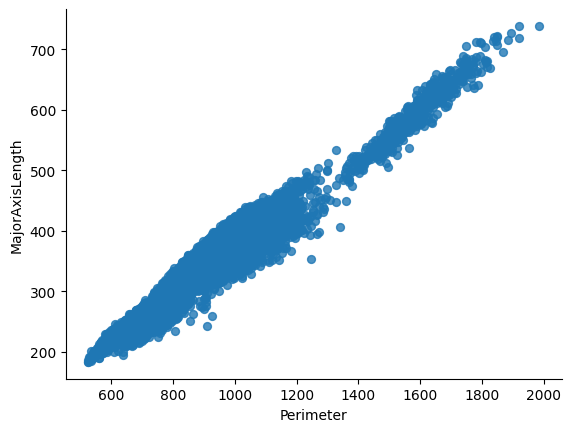

In [5]:
# @title Perimeter vs MajorAxisLength

from matplotlib import pyplot as plt
bean1.plot(kind='scatter', x='Perimeter', y='MajorAxisLength', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

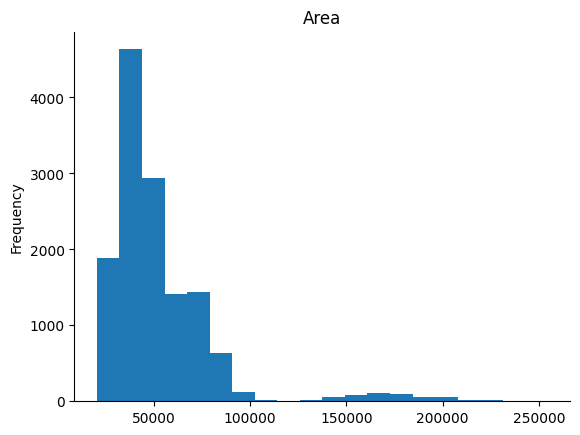

In [4]:
bean1['Area'].plot(kind='hist', bins=20, title='Area')
plt.gca().spines[['top', 'right',]].set_visible(False)

# EDA


In [ ]:
bean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [ ]:
bean1.describe(percentiles=[0.01,.02,0.05,0.06, 0.25,.50,.75,.95,0.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,5%,6%,25%,50%,75%,95%,96%,97%,98%,99%,max
Area,13611.0,53048.284549,29324.095717,20420.000000,24312.100000,25585.400000,27660.500000,28235.800000,36328.000000,44652.000000,61332.000000,89824.500000,100915.600000,154758.500000,170646.800000,186371.200000,254616.000000
Perimeter,13611.0,855.283459,214.289696,524.736000,577.659400,593.612200,617.737000,625.283000,703.523500,794.941000,977.213000,1181.124000,1262.594200,1492.397800,1576.447800,1654.072900,1985.370000
MajorAxisLength,13611.0,320.141867,85.694186,183.601165,210.158278,216.451934,224.644675,226.971060,253.303633,296.883367,376.495012,448.323944,476.046539,547.381447,588.007130,628.302071,738.860153
MinorAxisLength,13611.0,202.270714,44.970091,122.512653,144.023143,147.309041,153.813627,155.360793,175.848170,192.431733,217.031741,267.885177,286.531682,354.406571,370.137601,387.354168,460.198497
AspectRation,13611.0,1.583242,0.246678,1.024868,1.139028,1.163898,1.208047,1.218892,1.432307,1.551124,1.707109,2.082011,2.105891,2.133319,2.164089,2.205338,2.430306
Eccentricity,13611.0,0.750895,0.092002,0.218951,0.478767,0.511670,0.561049,0.571765,0.715928,0.764441,0.810466,0.877102,0.880062,0.883329,0.886834,0.891284,0.911423
ConvexArea,13611.0,53768.200206,29774.915817,20684.000000,24647.200000,25895.000000,28011.500000,28565.200000,36714.500000,45178.000000,62294.000000,91282.000000,102016.200000,156862.200000,172578.800000,188821.300000,263261.000000
EquivDiameter,13611.0,253.064220,59.177120,161.243764,175.940691,180.489176,187.665773,189.607323,215.068003,238.438026,279.446467,338.183538,358.454631,443.897107,466.126863,487.129519,569.374358
Extent,13611.0,0.749733,0.049086,0.555315,0.602739,0.616101,0.655108,0.664699,0.718634,0.759859,0.786851,0.812253,0.814488,0.817175,0.820821,0.826043,0.866195
Solidity,13611.0,0.987143,0.004660,0.919246,0.969815,0.973795,0.978405,0.979365,0.985670,0.988283,0.990013,0.992027,0.992221,0.992415,0.992650,0.993007,0.994677


In [ ]:
np.unique(bean1["Class"])

array(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],
      dtype=object)

In [ ]:
bean1["Class"].value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

([<matplotlib.patches.Wedge at 0x7c791b157f10>,
 [Text(-0.8031053388441574, 0.751679329714481, 'DERMASON'),
  Text(-0.8590866710336498, -0.6870007945063251, 'SIRA'),
  Text(0.19696927760947053, -1.0822213746170437, 'SEKER'),
  Text(0.9767600660359977, -0.505904905488525, 'HOROZ'),
  Text(1.0358013317159573, 0.3702912383725135, 'CALI'),
  Text(0.5712970678224916, 0.9400104575468422, 'BARBUNYA'),
  Text(0.13221222885441256, 1.092025607090488, 'BOMBAY')])

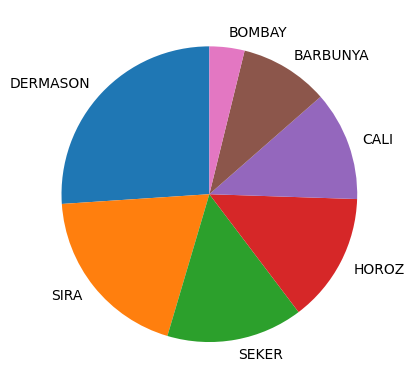

In [ ]:
plt.pie(bean1["Class"].value_counts(),startangle=90, labels=['DERMASON','SIRA','SEKER', 'HOROZ','CALI','BARBUNYA', 'BOMBAY'] )

<Axes: xlabel='Class', ylabel='count'>

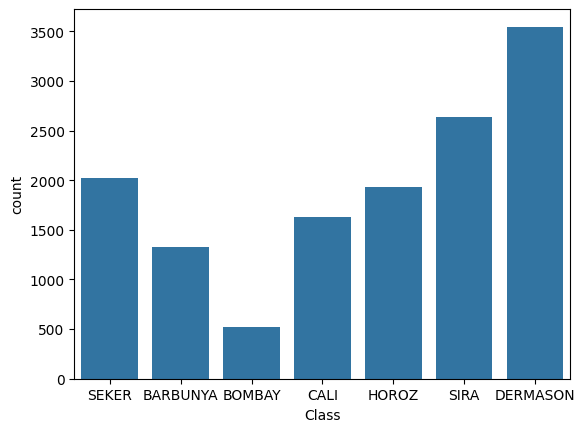

In [ ]:
sns.countplot(x='Class', data = bean1)

In [ ]:
bean1.corr()

<ipython-input-12-0279e3add849>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  bean1.corr()


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502
Solidity,-0.196585,-0.303970,-0.284302,-0.155831,-0.267754,-0.297592,-0.206191,-0.231648,0.191389,1.000000,0.607150,0.303766,0.153388,0.343559,0.307662,0.702163


In [ ]:
# sns.pairplot(data=bean1, kind="sactter", hue="Class")
# plt.show()

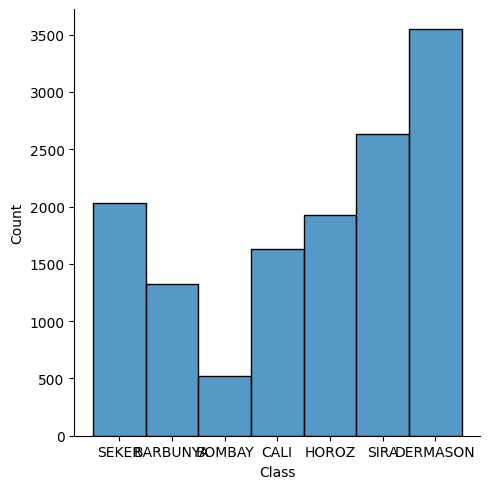

In [ ]:
sns.displot(data=bean1 , x= "Class")

In [ ]:
labelencoder = LabelEncoder()
bean1["Class"] = labelencoder.fit_transform(bean1['Class'])

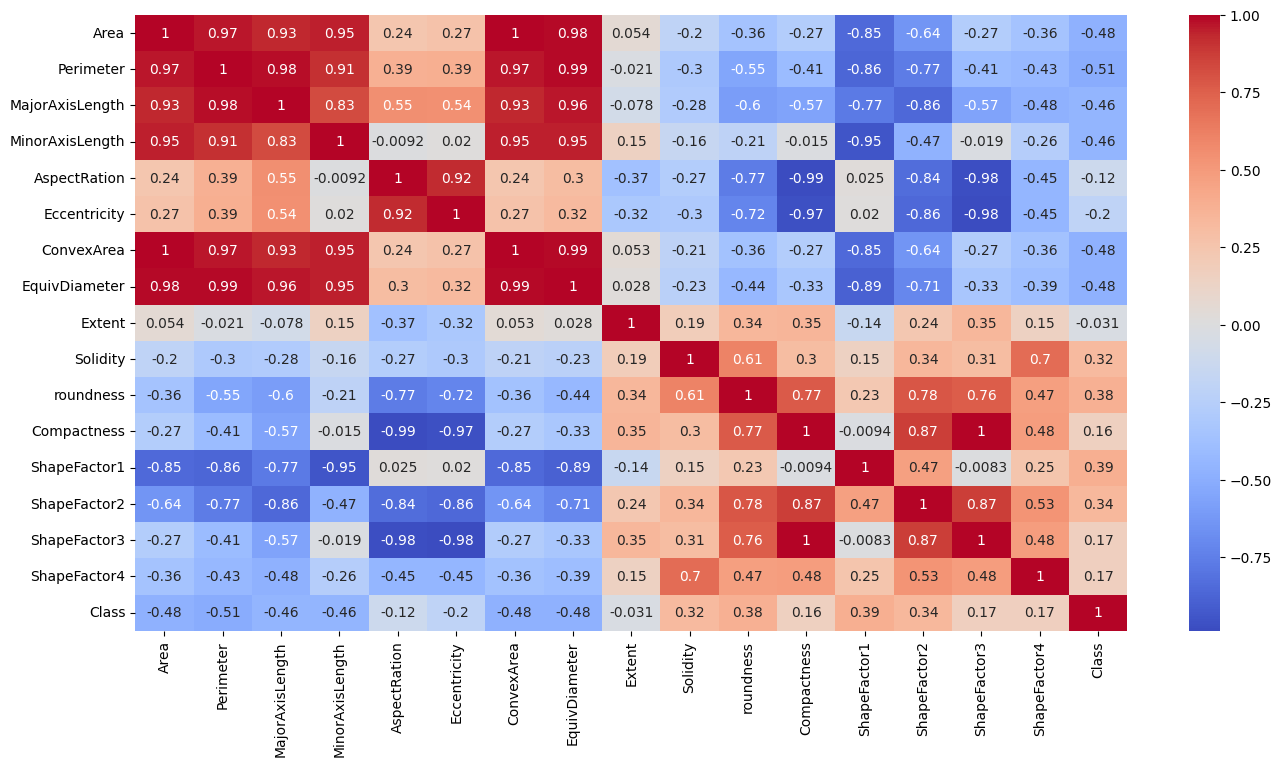

In [ ]:
plt.figure(figsize=(16,8))
sns.heatmap(bean1.corr() , annot=True, cmap="coolwarm")
plt.show();



In [ ]:
bean1= bean1.drop_duplicates()

In [ ]:
x=bean1.drop("Class" , axis=1)
y= bean1["Class"]

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Logistic Regression

In [ ]:
#?LogisticRegression

In [ ]:
log_reg = LogisticRegression(penalty ="l2", solver='lbfgs', max_iter=1000, random_state=0)
log_reg.fit(x_train,y_train.values.ravel())
y_predict = log_reg.predict(x_test)
y_predict

array([5, 2, 3, ..., 2, 4, 2])

In [ ]:
accuracy_log_reg = accuracy_score(y_test,y_predict)
print("Accuarcy in Logistic Regression",accuracy_log_reg)

Accuarcy in Logistic Regression 0.9208053691275168


In [ ]:
cm= confusion_matrix(y_test, y_predict)
cm

array([[ 410,    0,   22,    0,    0,    2,   13],
       [   0,  177,    0,    0,    0,    0,    0],
       [  20,    0,  495,    0,    8,    2,    7],
       [   0,    0,    0, 1049,    2,   15,   86],
       [   0,    0,    7,    5,  597,    0,   12],
       [   8,    0,    0,   12,    0,  623,   21],
       [   2,    0,    1,   72,   23,   14,  765]])

In [ ]:
print (' classification report for the test set :\n',classification_report(y_test, y_predict))

 classification report for the test set :
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       447
           1       1.00      1.00      1.00       177
           2       0.94      0.93      0.94       532
           3       0.92      0.91      0.92      1152
           4       0.95      0.96      0.95       621
           5       0.95      0.94      0.94       664
           6       0.85      0.87      0.86       877

    accuracy                           0.92      4470
   macro avg       0.93      0.93      0.93      4470
weighted avg       0.92      0.92      0.92      4470



# Descision Tree

In [ ]:
decision_tree = DecisionTreeClassifier(criterion = 'log_loss',random_state=42)
decision_tree.fit(x_train,y_train.values.ravel())
y_predict = decision_tree.predict(x_test)

In [ ]:
accuracy_desicion_tree = accuracy_score(y_test,y_predict)
print("Accuarcy in Desicion Tree",accuracy_desicion_tree)

Accuarcy in Desicion Tree 0.8919463087248322


In [ ]:
cm= confusion_matrix(y_test, y_predict)
cm

array([[ 401,    0,   29,    0,    3,    4,   10],
       [   1,  176,    0,    0,    0,    0,    0],
       [  27,    0,  483,    0,   17,    2,    3],
       [   0,    0,    0, 1024,    8,   25,   95],
       [   4,    0,   16,    7,  575,    0,   19],
       [   4,    0,    1,   34,    0,  606,   19],
       [  10,    0,    8,   94,   21,   22,  722]])

In [ ]:
print (' classification report for the test set :\n',classification_report(y_test, y_predict))

 classification report for the test set :
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       447
           1       1.00      0.99      1.00       177
           2       0.90      0.91      0.90       532
           3       0.88      0.89      0.89      1152
           4       0.92      0.93      0.92       621
           5       0.92      0.91      0.92       664
           6       0.83      0.82      0.83       877

    accuracy                           0.89      4470
   macro avg       0.91      0.91      0.91      4470
weighted avg       0.89      0.89      0.89      4470



# Random Forest

In [ ]:
random_forest = RandomForestClassifier(criterion ='entropy',n_estimators = 15,random_state = 42)
random_forest.fit(x_train,y_train.values.ravel())
y_predict = random_forest.predict(x_test)

In [ ]:
accuracy_random_forest = accuracy_score(y_test,y_predict)
print("Accuarcy in Random Forest",accuracy_random_forest)

Accuarcy in Random Forest 0.9201342281879195


In [ ]:
cm= confusion_matrix(y_test, y_predict)
cm

array([[ 411,    0,   27,    0,    0,    2,    7],
       [   2,  175,    0,    0,    0,    0,    0],
       [  21,    0,  499,    0,    7,    1,    4],
       [   0,    0,    0, 1079,    3,   17,   53],
       [   2,    0,   14,    7,  585,    0,   13],
       [   7,    0,    0,   27,    0,  613,   17],
       [   6,    0,    1,   98,   19,   23,  730]])

In [ ]:
print (' classification report for the test set :\n',classification_report(y_test, y_predict))

 classification report for the test set :
               precision    recall  f1-score   support

           0       0.90      0.90      0.90       447
           1       1.00      0.99      1.00       177
           2       0.93      0.92      0.93       532
           3       0.91      0.93      0.92      1152
           4       0.94      0.95      0.95       621
           5       0.94      0.94      0.94       664
           6       0.88      0.86      0.87       877

    accuracy                           0.92      4470
   macro avg       0.93      0.93      0.93      4470
weighted avg       0.92      0.92      0.92      4470



# Guassian Navie Bayes

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train,y_train.values.ravel())
y_predict = gnb.predict(x_test)
y_predict

array([5, 0, 3, ..., 2, 4, 2])

In [ ]:
accuracy_gnb = accuracy_score(y_test,y_predict)
print("Accuarcy in Guassian Navie Bayes",accuracy_gnb)

Accuarcy in Guassian Navie Bayes 0.8910514541387025


In [ ]:
cm= confusion_matrix(y_test, y_predict)
cm

array([[363,   0,  67,   0,   1,   2,  14],
       [  0, 177,   0,   0,   0,   0,   0],
       [ 45,   1, 474,   0,   9,   1,   2],
       [  0,   0,   0, 997,   2,  27, 126],
       [  1,   0,   8,   6, 596,   0,  10],
       [  9,   0,   0,   7,   0, 624,  24],
       [  8,   0,   2,  66,  29,  20, 752]])

In [ ]:
print (' classification report for the test set :\n',classification_report(y_test, y_predict))

 classification report for the test set :
               precision    recall  f1-score   support

           0       0.85      0.81      0.83       447
           1       0.99      1.00      1.00       177
           2       0.86      0.89      0.88       532
           3       0.93      0.87      0.89      1152
           4       0.94      0.96      0.95       621
           5       0.93      0.94      0.93       664
           6       0.81      0.86      0.83       877

    accuracy                           0.89      4470
   macro avg       0.90      0.90      0.90      4470
weighted avg       0.89      0.89      0.89      4470



#KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 35)
knn.fit(x_train,y_train.values.ravel())
y_predict = knn.predict(x_test)
y_predict

array([5, 2, 3, ..., 2, 4, 2])

In [ ]:
accuracy_knn = accuracy_score(y_test,y_predict)
print("Accuarcy in KNN ",accuracy_knn)

Accuarcy in KNN  0.9217002237136466


In [ ]:
cm= confusion_matrix(y_test, y_predict)
cm

array([[ 393,    0,   38,    0,    1,    4,   11],
       [   0,  177,    0,    0,    0,    0,    0],
       [  13,    0,  505,    0,    8,    1,    5],
       [   0,    0,    0, 1064,    1,   15,   72],
       [   0,    0,   10,    4,  593,    0,   14],
       [   7,    0,    0,   18,    0,  620,   19],
       [   4,    0,    0,   79,   17,    9,  768]])

In [ ]:
print (' classification report for the test set :\n',classification_report(y_test, y_predict))

 classification report for the test set :
               precision    recall  f1-score   support

           0       0.94      0.88      0.91       447
           1       1.00      1.00      1.00       177
           2       0.91      0.95      0.93       532
           3       0.91      0.92      0.92      1152
           4       0.96      0.95      0.96       621
           5       0.96      0.93      0.94       664
           6       0.86      0.88      0.87       877

    accuracy                           0.92      4470
   macro avg       0.93      0.93      0.93      4470
weighted avg       0.92      0.92      0.92      4470



# Support Vector Machine

In [ ]:
support_vector = SVC(kernel="rbf")
support_vector.fit(x_train,y_train.values.ravel())
y_predict = support_vector.predict(x_test)
y_predict

array([5, 2, 3, ..., 2, 4, 2])

In [ ]:
accuracy_support_vector = accuracy_score(y_test,y_predict)
print("Accuarcy in support Vector machine",accuracy_support_vector)

Accuarcy in support Vector machine 0.9284116331096197


In [ ]:
cm= confusion_matrix(y_test, y_predict)
cm

array([[ 412,    0,   22,    0,    0,    3,   10],
       [   0,  177,    0,    0,    0,    0,    0],
       [  16,    0,  502,    0,    9,    2,    3],
       [   0,    0,    0, 1068,    2,   10,   72],
       [   0,    0,    8,    5,  595,    0,   13],
       [   3,    0,    0,   16,    0,  629,   16],
       [   4,    0,    1,   78,   18,    9,  767]])

In [ ]:
print (' classification report for the test set :\n',classification_report(y_test, y_predict))

 classification report for the test set :
               precision    recall  f1-score   support

           0       0.95      0.92      0.93       447
           1       1.00      1.00      1.00       177
           2       0.94      0.94      0.94       532
           3       0.92      0.93      0.92      1152
           4       0.95      0.96      0.96       621
           5       0.96      0.95      0.96       664
           6       0.87      0.87      0.87       877

    accuracy                           0.93      4470
   macro avg       0.94      0.94      0.94      4470
weighted avg       0.93      0.93      0.93      4470



# PCA

In [ ]:
pca = PCA(n_components=8)
pca.fit(x)
x_pca = pca.transform(x)
transformed_data = pd.DataFrame(x_pca)

In [ ]:
x = transformed_data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)


In [ ]:
x_train =scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 35) #,metric = 'manhattan')
knn.fit(x_train,y_train.values.ravel())
y_predict = knn.predict(x_test)
y_predict

array([5, 6, 3, ..., 2, 4, 2])

In [ ]:
accuracy = accuracy_score(y_test,y_predict)
accuracy

0.9199105145413871

In [ ]:
summary = pd.DataFrame(data= ["Logistic Regression" ,
                              "KNN",
                              "Desicion Tree",
                              "Random Forest",
                              "Support Vector Machine",
                              "Gaussian Navie Bayes"
                              ],columns=["Models"])
summary["Accuracy_Score"] = accuracy_log_reg , accuracy_knn , accuracy_desicion_tree,accuracy_random_forest, accuracy_support_vector, accuracy_gnb
summary

,Models,Accuracy_Score
0,Logistic Regression,0.920805
1,KNN,0.921700
2,Desicion Tree,0.892170
3,Random Forest,0.918568
4,Support Vector Machine,0.928412
5,Gaussian Navie Bayes,0.891051


# PARAMETERS

In [ ]:
bean = pd.read_excel("/content/drive/MyDrive/mydataset/Dry_Bean - CLAssification /Dry_Bean_Dataset.xlsx")
bean

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.33, random_state = 42)

In [ ]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# BEST PARAMETERS
 ## Support vector machine -- best Parameters

In [ ]:
# ?SVC

In [ ]:
param_grid_svc = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf'], 'gamma': [0.1, 0.01, 0.001]}

In [ ]:
model = SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid_svc, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']})

In [ ]:
best_params = grid_search.best_params_
best_params

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}

## KNN -- best Parameters

In [ ]:
# ?KNeighborsClassifier

In [ ]:
param_grid_knn = {'n_neighbors': np.arange(1, 50)}

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid_knn, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [ ]:
best_params = grid_search.best_params_
best_params

{'n_neighbors': 11}

## Random Forest-- Best Parameters

In [ ]:
# ?RandomForestClassifier

In [ ]:
rf= RandomForestClassifier()

In [ ]:
param_grid_rf = {"criterion" : ["gini", "entropy", "log_loss"],
                 'n_estimators': [5,10, 15]
                 }

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'n_estimators': [5, 10, 15]})

In [ ]:
best_params = grid_search.best_params_
best_params

{'criterion': 'entropy', 'n_estimators': 15}

## Desicion Tree -- Best Parameters

In [ ]:
# ?DecisionTreeClassifier

In [ ]:
dt= DecisionTreeClassifier()

In [ ]:
param_grid_dt = {"criterion" : ["gini", "entropy", "log_loss"]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5)
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss']})

In [ ]:
best_params = grid_search.best_params_
best_params

{'criterion': 'log_loss'}

# Summary

In [ ]:
summary = pd.DataFrame(data= ["Logistic Regression" ,
                              "KNN",
                              "Desicion Tree",
                              "Random Forest",
                              "Support Vector Machine",
                              "Gaussian Navie Bayes"
                              ],columns=["Models"])
summary["Accuracy_Score"] = accuracy_log_reg , accuracy_knn , accuracy_desicion_tree,accuracy_random_forest, accuracy_support_vector, accuracy_gnb
summary

,Models,Accuracy_Score
0,Logistic Regression,0.920805
1,KNN,0.921700
2,Desicion Tree,0.891946
3,Random Forest,0.920134
4,Support Vector Machine,0.928412
5,Gaussian Navie Bayes,0.891051
